<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Librerías**

In [68]:
import random as rnd
import math
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from tabulate import tabulate
import pandas as pd
import scipy . stats as sts
import seaborn as sns

# **Método de Montecarlo**

Estimacion de


$  \int_{0}^{1} Cos (\frac{\pi x}{2}) dx$  


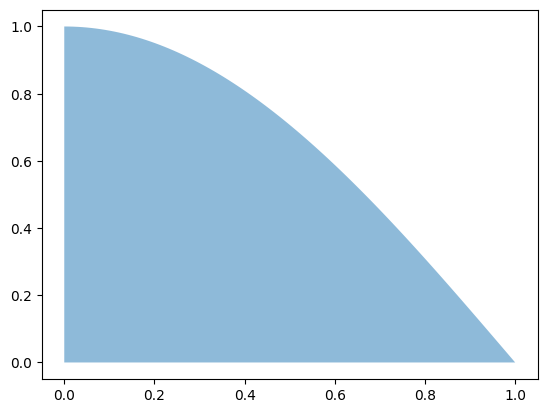

In [69]:
# Gráficar la curva de la funcion
# Generar 100 valores de x entre [0,1]
x=np.linspace(0,1,100)
    # Calcular el valor de y para cada x y hace la gráfica
fig, ax = plt.subplots()
ax.fill_between(x, np.cos((math.pi*x)/2), alpha = 0.5)

## ***Media Muestral (crudo)***

Si se desea calcular:

$\int_{a}^{b} f(x) dx$

Y se tiene la siguiente función de densidad de una distribucion uniforme

$ h(x)= \frac{1}{b-a}$

Por definición

$E( f(x) ) = \int_{a}^{b} f(x) h(x) dx$

Sustituyendo el valor de la funcion de densidad en la ecuación anterior

$E( f(x) ) = \int_{a}^{b} f(x) \frac{1}{b-a} dx \longrightarrow$ $E( f(x) ) = \frac{1}{b-a} \int_{a}^{b} f(x) dx $

Despejando la integral a calcular

$ \int_{a}^{b} f(x) dx = E( f(x) ) ( b-a ) $

Por la ley de los grandes números

$E( f(x) ) \approx \frac{1}{n} \sum_{i=1}^{n} f( x_{i} )$

Cada $x_{i}$ es un número aleatorio elegido en $[a,b]$

Entonces

$ \int_{a}^{b} f(x) dx = \approx \frac{b-a}{n} \sum_{i=1}^{n} f( x_{i} ) $

### **Estimación**


$  \int_{0}^{1} Cos (\frac{\pi x}{2}) dx$  


Donde tenemos

$f(x) = Cos (\frac{\pi x}{2}) \hspace{1cm} a = 0 \hspace{1cm} b = 1 $

### **Código para calcular la aproximación**

In [70]:
#Valores de los límites de la integral
a=0
b=1
# Determinar n
n = 1000
# Listas vacias para guardar resultados
X = []
Y = []
for i in range(n):
  # Generar Xi con i = 1,2,...,n
  Xi= rnd.random()
  # Agregar Xi a la lista X
  X.append(Xi)
  # Hacer Yi = Cos((pi*Xi)/2)
  Yi= math.cos((math.pi*Xi)/2)
  # Agregar Yi a la lista Y
  Y.append(Yi)
# Calcular la suma de lista Y que contiene los f(xi)
suma=sum(Y)
# Calcular la aproximacion de la integral con media muestral
aproximacion_media_muestral = ((b-a)/n)*suma
# Imprimir el valor de la aproximacion
print("El valor aproximado de la integral es",aproximacion_media_muestral)

El valor aproximado de la integral es 0.6366394444861296


### **Función que calcula la aproximación con n números aleatorios**

In [71]:
def Aproximacion_Media_Muestral(n):
  # Listas vacias para guardar resultados
  X = []
  Y = []
  for i in range(n):
    # Generar Xi con i = 1,2,...,n
    Xi= rnd.random()
    # Agregar Xi a la lista X
    X.append(Xi)
    # Hacer Yi = Cos((pi*Xi)/2)
    Yi= math.cos((math.pi*Xi)/2)
    # Agregar Yi a la lista Y
    Y.append(Yi)
  # Calcular la suma de lista Y que contiene los f(xi)
  suma=sum(Y)
  # Calcular la aproximacion de la integral con media muestral
  aproximacion_media_muestral = ((b-a)/n)*suma
  # Imprimir el valor de la aproximacion
  return aproximacion_media_muestral

**Número de repeticiones para lograr una mejor aproximación del resultado**

Para calcular una mejor aproximación hay que repetir r veces el calculo de la aproximacion y obtener el valor esperado de estas r repeticiones con $r = 1,2,3,...,r$

0.6357160909384171


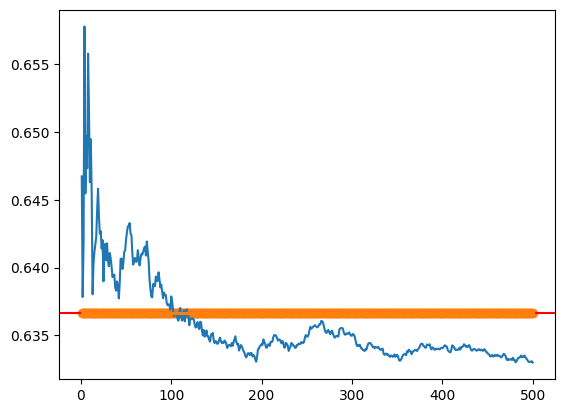

In [72]:
# suma -> Variable que guarda la suma de los valores de la aproximacion en cada repetición
suma=0
# repeticiones -> Lista que guarda el número de repeticiones
repeticiones=[]
# promedios -> Lista que guarda los promedios para cada repetición
promedios=[]
ys=[]
# Ciclo que realiza las r repeticiones
for i in range(500):
  # n -> Numeros aleatorios a generar en cada repetición
  n= 50
  # Uso de la funcion Aproximacion con el método media muestral
  aproximacion=Aproximacion_Media_Muestral(n)
  # Se suma la nueva aproximacion calculada
  suma=suma+aproximacion
  # Se calcula el promedio
  promedio=suma/(i+1)
  # Se agrega a la lista de repeticiones la repeticion que se hace al momento
  repeticiones.append(i+1)
  # Se agrega a la lista de promedios el rpomedio obtenido
  promedios.append(promedio)
  ys.append(2/np.pi)
#I_Media_Muestral -> Aproximacion con método de media muestral
I_Media_Muestral=st.mean(promedios)
print(I_Media_Muestral)
# Grafica de los resultados con repeticiones en el eje x y promedios en el eje y
plt.plot(repeticiones,promedios)
# Se traza la linea del valor real de la integral
plt.axhline(2/np.pi,color="red")
#grafico -> Intervalo de confianza
gráfico= sns.regplot(x=repeticiones,y=ys,ci = 95 )

### **Varianza**

In [73]:
#var1->  Varianza del método Media Muestral
var1=np.var(promedios)



## **Acierto y error**

El método de acierto y error consiste en lanzar aleatoriamente un dardo en un cuadrado y si este cae debajo de la curva morada se considera éxito pero si por el contrario cae por encima de la cruva se considera como fracaso.

### **Muestra del experimento del dardo**

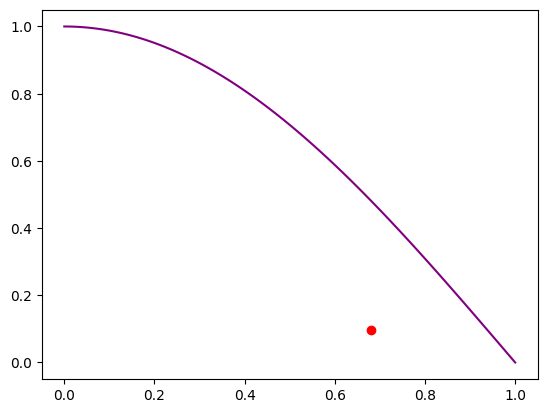

In [74]:
# Gráficar la curva de la funcion
    # Generar 100 valores de x entre [0,1]
x=np.linspace(0,1,100)
    # Calcular el valor de y para cada x y hace la gráfica
plt.plot(x,np.cos((math.pi*x)/2),color="purple")
# Gráficar el punto donde caera el dardo
    # Generar u1 que es la posición en x
u1=rnd.random()
    # Generar u2 que es la posición en y
u2=rnd.random()
    # Hace la gráfica
plt.scatter(u1,u2,color="red")
plt.show()

### **Aproximación con dardos**

Este experimento se realiza N veces, cuando  se concluyen todos los lanzamientos se hace el conteo de los dardos que resultaron un éxito y se hace la aproximación dividiendo el número de éxitos entre N, que es el número de dardos que se lanzarón.

$  \int_{0}^{1} Cos (\frac{\pi x}{2}) dx \approx  
\frac{\# \hspace{0.5cm} exitos}{ total \hspace{0.2cm} de \hspace{0.2cm} dardos \hspace{0.2cm} lanzados} $  

 **Función que calcula el número de exitos con N dardos lanzados y da su gráfica**

In [75]:
def Numero_exitos(intentos):
  # GRAFICAR LA CURVA DE LA FUNCION
    # Generar 100 valores de x entre [0,1]
  x=np.linspace(0,1,100)
    # Calcular el valor de y para cada x y hace la gráfica
  plt.plot(x,np.cos((math.pi*x)/2),color="blue")

  # CICLO PARA REPETIR EL EXPERIMENTO N VECES
    # n -> NUMERO DE EXITOS
  n=0
  for i in range(intentos):
    # u1 que es la posición en x
    u1=rnd.random()
    # u2 que es la posición en y
    u2=rnd.random()
    #CONDICION PARA EL EXITO
    if u2<=np.cos((math.pi*u1)/2):
      plt.scatter(u1,u2,color="green")
      n=n+1
    else:
      plt.scatter(u1,u2,color="red")
  return n

**Cálculo de la aproximación**

La aproximación con 50 intentos es 0.62


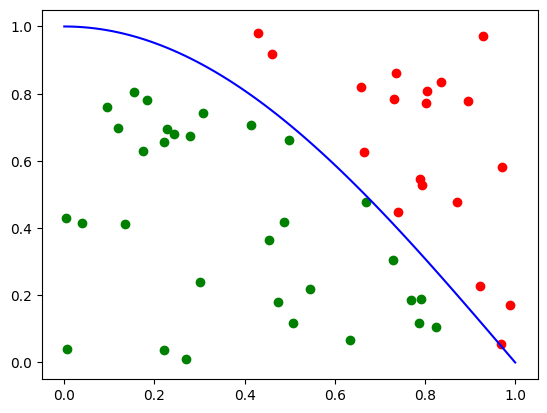

In [76]:
# N-> Número de dardos a lanzar
N=50
# exitos -> Número de exitos obtenidos con N intentos
exitos=Numero_exitos(N)
# Calcular la aproximacion de la integral con acierto y error
# Aproximacion_acierto_error -> Valor obtenido de dividir el numero de exitos entre el numero de dardos lanzados
Aproximacion_acierto_error =(exitos)/N
print("La aproximación con",N,"intentos es",Aproximacion_acierto_error)

**Función que calcula la aproximacion con N dardos lanzados**

In [77]:
def Aproximacion_Acierto_Error(intentos):
  # CICLO PARA REPETIR EL EXPERIMENTO N VECES
    # n -> NUMERO DE EXITOS
  n=0
  for i in range(intentos):
    # u1 que es la posición en x
    u1=rnd.random()
    # u2 que es la posición en y
    u2=rnd.random()
    #CONDICION PARA EL EXITO
    if u2<=np.cos((math.pi*u1)/2):
      n=n+1
    else:
      n=n
    # Calculo de la aproximación
    aproximacion =(n)/intentos
  return aproximacion

**Número de repeticiones para lograr una mejor aproximación del resultado**

Para calcular una mejor aproximación hay que repetir r veces el calculo de la aproximacion y obtener el valor esperado de estas r repeticiones con $r = 1,2,3,...,r$

0.6325325722043088


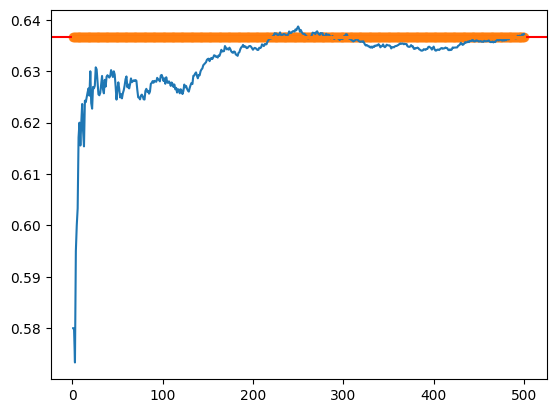

In [78]:
# suma -> Variable que guarda la suma de los valores de la aproximacion en cada repetición
suma=0
# repeticiones -> Lista que guarda el número de repeticiones
repeticiones=[]
# promedios -> Lista que guarda los promedios para cada repetición
promedios=[]
ys=[]
# Ciclo que realiza las r repeticiones
for i in range(500):
  # intentos -> Numero de intentos para calcular cada aproximacion
  intentos=50
  # Uso de la funcion Aproximacion
  aproximacion=Aproximacion_Acierto_Error(intentos)
  # Se suma la nueva aproximacion calculada
  suma=suma+aproximacion
  # Se calcula el promedio
  promedio=suma/(i+1)
  # Se agrega a la lista de repeticiones la repeticion que se hace al momento
  repeticiones.append(i+1)
  # Se agrega a la lista de promedios el rpomedio obtenido
  promedios.append(promedio)
  ys.append(2/np.pi)
#I_Acierto_Error -> Aproximacion con método Acierto y Error
I_Acierto_Error=st.mean(promedios)
print(I_Acierto_Error)
# Grafica de los resultados con repeticiones en el eje x y promedios en el eje y
plt.plot(repeticiones,promedios)
# Se traza la linea del valor real de la integral
plt.axhline(2/np.pi,color="red")
#grafico -> Intervalo de confianza
gráfico= sns.regplot(x=repeticiones,y=ys,ci = 95 )

### **Varianza**

In [79]:
#var2->  Varianza del método Acierto y Error
var2=np.var(promedios)



## **Muestreo de importancia**

Si se desea calcular:

$\int_{a}^{b} f(x) dx$

Se propone una funcion **g(x)** que se asemeje a **f(x)**

$g(x) = 1-x^{2}$

**Imagen(1)**

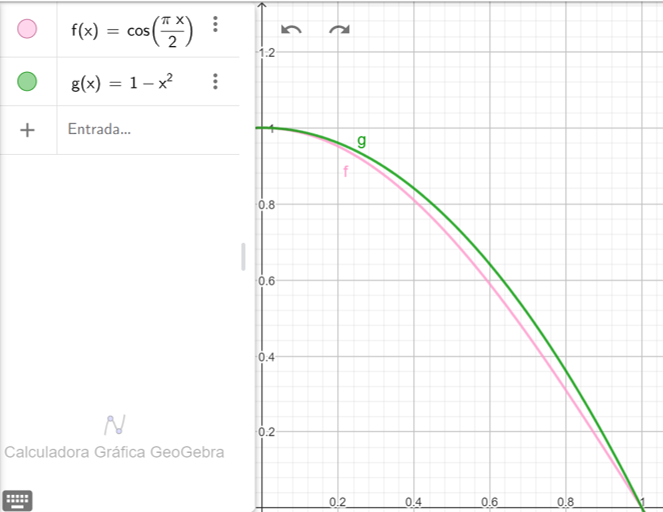

Se comprueba que $g(x)$ es una función de distribución de probabilidad

*Condiciones*

**1) $g(x) \geq 0 \hspace{0.5cm} para \hspace{0.5cm} 0\leq x \leq 1$**

Se puede observar en la imagen (1) que la condicion 1 se cumple.

2) $  \int_{0}^{1} g(x)dx = 1 $  

$  \int_{0}^{1} (1-x^{2})dx = [x- \frac{x^{3}}{3}]_{0}^{1} = [1- \frac{1^{3}}{3}]-[0- \frac{0^{3}}{3}] = 1- \frac{1}{3} = \frac{2}{3}$  

Por lo tanto, para que la condicion dos se cumpla hay que multipicar a g(x) por $\frac{3}{2}$, entonces :

$g(x) = \frac{3}{2}(1-x^{2})$


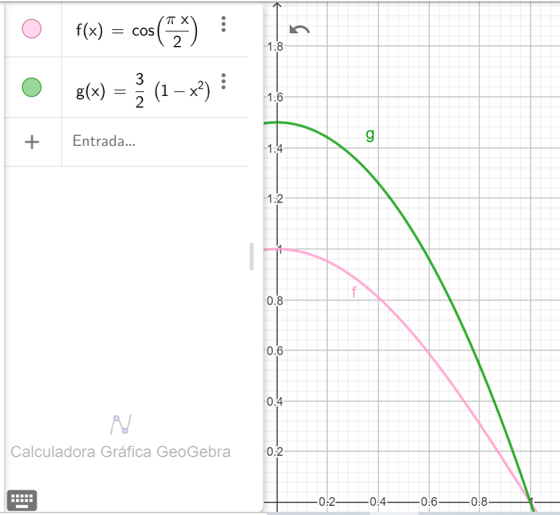

Usamos el método de aceptación y rechazo para obtener $x_{i} \sim g(x)$

 Tomamos $t(x)$ como la funcón que máximiza a $g(x)$

$t(x) = \frac{3}{2}$

### **Codigo para generar a los valores $x_{i}$ que siguen la distribucion $g(x)$**

Comprobamos con la gráfica a continuación que si se forma la función g(x)

(array([610., 606., 574., 626., 588., 598., 531., 536., 506., 533., 473.,
        491., 399., 448., 382., 395., 310., 307., 276., 248., 184., 137.,
        130.,  83.,  30.]),
 array([2.47257965e-05, 3.94501906e-02, 7.88756554e-02, 1.18301120e-01,
        1.57726585e-01, 1.97152050e-01, 2.36577515e-01, 2.76002979e-01,
        3.15428444e-01, 3.54853909e-01, 3.94279374e-01, 4.33704839e-01,
        4.73130303e-01, 5.12555768e-01, 5.51981233e-01, 5.91406698e-01,
        6.30832163e-01, 6.70257627e-01, 7.09683092e-01, 7.49108557e-01,
        7.88534022e-01, 8.27959487e-01, 8.67384951e-01, 9.06810416e-01,
        9.46235881e-01, 9.85661346e-01]),
 <BarContainer object of 25 artists>)

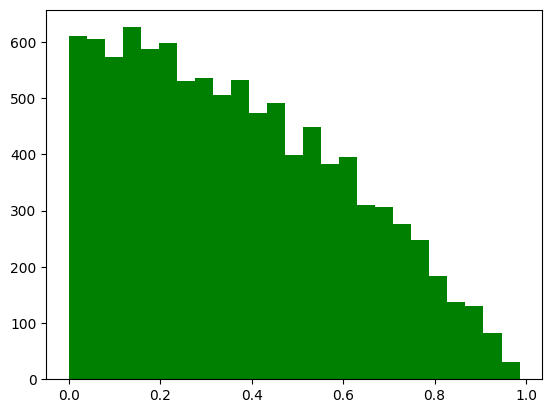

In [80]:
# g(x) = 1.5 - 1.5x
# h(x) = 1.5
# X -> Lista de x aceptadas
X=[]
# m -> Número de xi a generar
m = 10000
while len(X)<=m:
  #Generamos un x al azar [0,1]
  x= rnd.random()
  #Calculamos la probabilidad de aceptar a x p(aceptar)= g(x)/t(x)
  p = (1.5 - 1.5*(x**2))/1.5
  #Generamos Ux que sigue una distribucion uniforme entre [0,1]
  Ux = rnd.random()
  if Ux<=p:
    X.append(x)
plt.hist(X,bins=25,color="green")

**Función que genera los m xi de la muestra**

In [81]:
def Muestreo_importancia(m):
  # X -> Lista de x aceptadas
  X=[]
  while len(X)<=m:
    #Generamos un x al azar [0,1]
    x= rnd.random()
    #Calculamos la probabilidad de aceptar a x p(aceptar)= g(x)/t(x)
    p = (1.5 - 1.5*(x**2))/1.5
    #Generamos Ux que sigue una distribucion uniforme entre [0,1]
    Ux = rnd.random()
    if Ux<=p:
      X.append(x)
  return X

### **Código para calcular la aproximación con el muestreo de importancia**

In [82]:
#Valores de los límites de la integral
a=0
b=1
# Determinar n
n = 10
# Listas vacias para guardar resultados
X = []
Y = []
#Generar la muestra de importancia
M=Muestreo_importancia(n)
for i in range(n):
  # Tomar xi con i = 1,2,...,n
  Xi= M[i]
  # Agregar Xi a la lista X
  X.append(Xi)
  # Hacer Yi = Cos((pi*Xi)/2)
  Yi= math.cos((math.pi*(Xi))/2)/((3/2)*(1-(Xi**2)))
  # Agregar Yi a la lista Y
  Y.append(Yi)
# Calcular la suma de lista Y que contiene los f(xi)
suma=sum(Y)
# Calcular la aproximacion de la integral con muestreo de importancia
aproximacion_muestreo_importancia = ((b-a)/n)*suma
# Imprimir el valor de la aproximacion
print("El valor aproximado de la integral es",aproximacion_muestreo_importancia)

El valor aproximado de la integral es 0.6465413561014125


### **Función que calcula la aproximación con n números aleatorios**

In [83]:
def Aproximacion_Muestreo_Importancia(n):
  # Listas vacias para guardar resultados
  X = []
  Y = []
  #Generar la muestra de importancia
  M=Muestreo_importancia(n)
  for i in range(n):
    # Tomar xi con i = 1,2,...,n
    Xi= M[i]
    # Agregar Xi a la lista X
    X.append(Xi)
    # Hacer Yi = Cos((pi*Xi)/2)
    Yi= math.cos((math.pi*(Xi))/2)/((3/2)*(1-(Xi**2)))
    # Agregar Yi a la lista Y
    Y.append(Yi)
  # Calcular la aproximacion de la integral con media muestral de Y
  aproximacion_Muestro_Importancia = st.mean(Y)
  # Imprimir el valor de la aproximacion
  return aproximacion_Muestro_Importancia

**Número de repeticiones para lograr una mejor aproximación del resultado**

Para calcular una mejor aproximación hay que repetir r veces el calculo de la aproximacion y obtener el valor esperado de estas r repeticiones con $r = 1,2,3,...,r$

0.6363628887695496


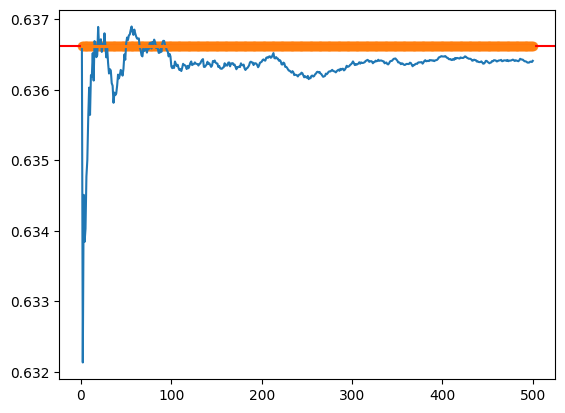

In [84]:
# suma -> Variable que guarda la suma de los valores de la aproximacion en cada repetición
suma=0
# repeticiones -> Lista que guarda el número de repeticiones
repeticiones=[]
# promedios -> Lista que guarda los promedios para cada repetición
promedios=[]
ys=[]
# Ciclo que realiza las r repeticiones
for i in range(500):
  # intentos -> Numero de intentos para calcular cada aproximacion
  intentos=50
  # Uso de la funcion Aproximacion
  aproximacion=Aproximacion_Muestreo_Importancia(intentos)
  # Se suma la nueva aproximacion calculada
  suma=suma+aproximacion
  # Se calcula el promedio
  promedio=suma/(i+1)
  # Se agrega a la lista de repeticiones la repeticion que se hace al momento
  repeticiones.append(i+1)
  # Se agrega a la lista de promedios el rpomedio obtenido
  promedios.append(promedio)
  ys.append(2/np.pi)
I_Muestreo_Importancia=st.mean(promedios)
print(I_Muestreo_Importancia)
# Grafica de los resultados con repeticiones en el eje x y promedios en el eje y
plt.plot(repeticiones,promedios)
# Se traza la linea del valor real de la integral
plt.axhline(2/np.pi,color="red")
#grafico -> Intervalo de confianza
gráfico= sns.regplot(x=repeticiones,y=ys,ci = 95 )

### **Varianza**

In [85]:
#var3->  Varianza del método Muestreo de Importancia
var3=np.var(promedios)

# **Tabla comparativa de los resultados**

In [86]:
#Resultados-> Tabla que guarda los resultados
Resultados=[]
#M1 -> Datos y resultados del método de Media Muestral(crudo)
M1=["Media Muestral",I_Media_Muestral,var1]
Resultados.append(M1)
#M2 -> Datos y resultados del método de Acierto y Error
M2=["Acierto y Error",I_Acierto_Error,var2]
Resultados.append(M2)
#M3 -> Datos y resultados del método de Muestreo de Importancia
M2=["Muestreo de importancia",I_Muestreo_Importancia,var3]
Resultados.append(M2)
print(tabulate(Resultados,headers=["Método","Aproximación","Varianza"]))


Método                     Aproximación     Varianza
-----------------------  --------------  -----------
Media Muestral                 0.635716  1.04399e-05
Acierto y Error                0.632533  4.27637e-05
Muestreo de importancia        0.636363  9.61887e-08


# **Tabla comparativa de las varianzas para determinar que método es el mas eficiente**


In [87]:
#Tabla_eficiencias-> Tabla comparativa de las eficiencias
Tabla_eficiencias=[]
#E11 -> Eficiencia entre método 1 y 1
E11=var1/var1
#E12 -> Eficiencia entre método 1 y 2
E12=var1/var2
#E13 -> Eficiencia entre método 1 y 3
E13=var1/var3
# Com_1-> Comparaciones con el método 1(Media Muestral)
Com_1=["Media Muestral",E11,E12,E13]
Tabla_eficiencias.append(Com_1)
#E21 -> Eficiencia entre método 1 y 2
E21=var2/var1
#E22 -> Eficiencia entre método 2 y 2
E22=var2/var2
#E23 -> Eficiencia entre método 2 y 3
E23=var2/var3
# Com_2-> Comparaciones con el método 2(Acierto y Error)
Com_2=["Acierto y Error",E21,E22,E23]
Tabla_eficiencias.append(Com_2)
#E31 -> Eficiencia entre método 3 y 1
E31=var3/var1
#E32 -> Eficiencia entre método 3 y 2
E32=var3/var2
#E33 -> Eficiencia entre método 3 y 3
E33=var3/var3
# Com_3-> Comparaciones con el método 3(Muestreo de Importancia)
Com_3=["Muestreo de Importancia",E31,E32,E33]
Tabla_eficiencias.append(Com_3)
print(tabulate(Tabla_eficiencias,headers=["Método","Media Muestral","Acierto y Error","Muestreo de Importancia"]))

Método                     Media Muestral    Acierto y Error    Muestreo de Importancia
-----------------------  ----------------  -----------------  -------------------------
Media Muestral                 1                   0.244129                     108.535
Acierto y Error                4.0962              1                            444.582
Muestreo de Importancia        0.00921359          0.0022493                      1


#**Conclusiones**

Con la tabla anterior podemos darnos cuenta que el método de ***Media Muestral es mas eficiente que el de Acierto y Error***, pero a su vez el método de ***Muestreo de importancia es mas eficiente tanto de Media Muestral como de Acierto y Error***, y podemos notarlo desde que su varianza es más pequeña.